<h3>Libraries import

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

<h3>Data import

In [2]:
df_train = pd.read_csv(r'D:\AI\Python_for_Data_Science\train.csv')

In [3]:
# Создаем dummy переменные
df_train = pd.get_dummies(df_train)
df_train.shape

(10000, 23)

In [4]:
df_train.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Healthcare_1,Helthcare_2,Shops_1,Price,Ecology_2_A,Ecology_2_B,Ecology_3_A,Ecology_3_B,Shops_2_A,Shops_2_B
count,10000.00000,10000.000000,10000.000000,10000.000000,7887.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,...,5202.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,8383.40770,50.400800,1.890500,56.315775,37.199645,6.273300,8.526700,12.609400,3.990166e+03,0.118858,...,1142.904460,1.319500,4.231300,214138.857399,0.009700,0.990300,0.027500,0.972500,0.082500,0.917500
std,4859.01902,43.587592,0.839512,21.058732,86.241209,28.560917,5.241148,6.775974,2.005003e+05,0.119025,...,1021.517264,1.493601,4.806341,92872.293865,0.098015,0.098015,0.163543,0.163543,0.275139,0.275139
min,0.00000,0.000000,0.000000,1.136859,0.370619,0.000000,1.000000,0.000000,1.910000e+03,0.000000,...,0.000000,0.000000,0.000000,59174.778028,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4169.50000,20.000000,1.000000,41.774881,22.769832,1.000000,4.000000,9.000000,1.974000e+03,0.017647,...,350.000000,0.000000,1.000000,153872.633942,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000
50%,8394.50000,36.000000,2.000000,52.513310,32.781260,6.000000,7.000000,13.000000,1.977000e+03,0.075424,...,900.000000,1.000000,3.000000,192269.644879,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000
75%,12592.50000,75.000000,2.000000,65.900625,45.128803,9.000000,12.000000,17.000000,2.001000e+03,0.195781,...,1548.000000,2.000000,6.000000,249135.462171,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000
max,16798.00000,209.000000,19.000000,641.065193,7480.592129,2014.000000,42.000000,117.000000,2.005201e+07,0.521867,...,4849.000000,6.000000,23.000000,633233.466570,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 23 columns):
Id               10000 non-null int64
DistrictId       10000 non-null int64
Rooms            10000 non-null float64
Square           10000 non-null float64
LifeSquare       7887 non-null float64
KitchenSquare    10000 non-null float64
Floor            10000 non-null int64
HouseFloor       10000 non-null float64
HouseYear        10000 non-null int64
Ecology_1        10000 non-null float64
Social_1         10000 non-null int64
Social_2         10000 non-null int64
Social_3         10000 non-null int64
Healthcare_1     5202 non-null float64
Helthcare_2      10000 non-null int64
Shops_1          10000 non-null int64
Price            10000 non-null float64
Ecology_2_A      10000 non-null uint8
Ecology_2_B      10000 non-null uint8
Ecology_3_A      10000 non-null uint8
Ecology_3_B      10000 non-null uint8
Shops_2_A        10000 non-null uint8
Shops_2_B        10000 non-null uint8
dtyp

In [6]:
df_test = pd.read_csv(r'D:\AI\Python_for_Data_Science\test.csv')

In [7]:
df_test.loc[df_test.Id == 10793]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
2071,10793,23,6.0,110.750226,NaN,0.0,2,2.0,2015,0.014073,B,B,2,475,0,NaN,0,0,B


In [8]:
# Создаем dummy переменные
df_test = pd.get_dummies(df_test)
df_test.shape

(5000, 22)

In [9]:
df_test.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Social_3,Healthcare_1,Helthcare_2,Shops_1,Ecology_2_A,Ecology_2_B,Ecology_3_A,Ecology_3_B,Shops_2_A,Shops_2_B
count,5000.000000,5000.000000,5000.000000,5000.000000,3959.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,...,5000.000000,2623.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,8412.595400,51.279200,1.910000,56.449500,36.158810,5.976800,8.632000,12.601000,1984.392600,0.119874,...,8.262600,1146.657263,1.31940,4.242800,0.009600,0.990400,0.029800,0.970200,0.082400,0.917600
std,4832.674037,44.179466,0.838594,19.092787,17.825287,9.950018,5.483228,6.789213,18.573149,0.120070,...,23.863762,1044.744231,1.47994,4.777365,0.097518,0.097518,0.170052,0.170052,0.275001,0.275001
min,1.000000,0.000000,0.000000,1.378543,0.333490,0.000000,1.000000,0.000000,1908.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4221.750000,21.000000,1.000000,41.906231,23.092026,1.000000,4.000000,9.000000,1973.000000,0.019509,...,0.000000,325.000000,0.00000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000
50%,8320.500000,37.000000,2.000000,52.921340,32.925087,6.000000,7.000000,12.000000,1977.000000,0.072158,...,2.000000,900.000000,1.00000,3.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000
75%,12598.250000,77.000000,2.000000,66.285129,45.174091,9.000000,12.000000,17.000000,2000.000000,0.195781,...,5.000000,1548.000000,2.00000,6.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000
max,16795.000000,212.000000,17.000000,223.453689,303.071094,620.000000,78.000000,99.000000,2020.000000,0.521867,...,141.000000,4849.000000,6.00000,23.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 22 columns):
Id               5000 non-null int64
DistrictId       5000 non-null int64
Rooms            5000 non-null float64
Square           5000 non-null float64
LifeSquare       3959 non-null float64
KitchenSquare    5000 non-null float64
Floor            5000 non-null int64
HouseFloor       5000 non-null float64
HouseYear        5000 non-null int64
Ecology_1        5000 non-null float64
Social_1         5000 non-null int64
Social_2         5000 non-null int64
Social_3         5000 non-null int64
Healthcare_1     2623 non-null float64
Helthcare_2      5000 non-null int64
Shops_1          5000 non-null int64
Ecology_2_A      5000 non-null uint8
Ecology_2_B      5000 non-null uint8
Ecology_3_A      5000 non-null uint8
Ecology_3_B      5000 non-null uint8
Shops_2_A        5000 non-null uint8
Shops_2_B        5000 non-null uint8
dtypes: float64(7), int64(9), uint8(6)
memory usage: 654.4 KB


<h3> 1.1) alfa test - NaN remove with median of all df_train

In [11]:
df_train_median_ls = df_train.LifeSquare.median()
df_train_median_ls

32.781260192155735

In [12]:
df_train_median_hc1 = df_train.Healthcare_1.median()
df_train_median_hc1

900.0

<h3>1.2) alfa test - Train, Valid division

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
alfa_train, alfa_valid = train_test_split(df_train, test_size = 0.3, random_state = 108)

In [15]:
alfa_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7000 entries, 3117 to 8337
Data columns (total 23 columns):
Id               7000 non-null int64
DistrictId       7000 non-null int64
Rooms            7000 non-null float64
Square           7000 non-null float64
LifeSquare       5513 non-null float64
KitchenSquare    7000 non-null float64
Floor            7000 non-null int64
HouseFloor       7000 non-null float64
HouseYear        7000 non-null int64
Ecology_1        7000 non-null float64
Social_1         7000 non-null int64
Social_2         7000 non-null int64
Social_3         7000 non-null int64
Healthcare_1     3685 non-null float64
Helthcare_2      7000 non-null int64
Shops_1          7000 non-null int64
Price            7000 non-null float64
Ecology_2_A      7000 non-null uint8
Ecology_2_B      7000 non-null uint8
Ecology_3_A      7000 non-null uint8
Ecology_3_B      7000 non-null uint8
Shops_2_A        7000 non-null uint8
Shops_2_B        7000 non-null uint8
dtypes: float64(8), int

In [16]:
alfa_valid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3000 entries, 1161 to 4198
Data columns (total 23 columns):
Id               3000 non-null int64
DistrictId       3000 non-null int64
Rooms            3000 non-null float64
Square           3000 non-null float64
LifeSquare       2374 non-null float64
KitchenSquare    3000 non-null float64
Floor            3000 non-null int64
HouseFloor       3000 non-null float64
HouseYear        3000 non-null int64
Ecology_1        3000 non-null float64
Social_1         3000 non-null int64
Social_2         3000 non-null int64
Social_3         3000 non-null int64
Healthcare_1     1517 non-null float64
Helthcare_2      3000 non-null int64
Shops_1          3000 non-null int64
Price            3000 non-null float64
Ecology_2_A      3000 non-null uint8
Ecology_2_B      3000 non-null uint8
Ecology_3_A      3000 non-null uint8
Ecology_3_B      3000 non-null uint8
Shops_2_A        3000 non-null uint8
Shops_2_B        3000 non-null uint8
dtypes: float64(8), int

In [17]:
# Для справки
alfa_train_median_ls = alfa_train.LifeSquare.median()
alfa_train_median_ls
# медиана меньше, чем для всего df_train

32.641536541087184

In [18]:
# Для справки
alfa_train_median_hc1 = alfa_train.Healthcare_1.median()
alfa_train_median_hc1
# медиана совпала со всем df_train

900.0

In [19]:
alfa_train_copy_df_median = alfa_train.copy()
alfa_valid_copy_df_median = alfa_valid.copy()
alfa_train_copy_df_median.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Healthcare_1,Helthcare_2,Shops_1,Price,Ecology_2_A,Ecology_2_B,Ecology_3_A,Ecology_3_B,Shops_2_A,Shops_2_B
3117,10620,38,1.0,46.318847,21.157799,1.0,15,14.0,2014,0.060753,...,520.0,0,7,236093.105632,0,1,0,1,0,1
1826,3554,1,3.0,87.510403,85.068033,0.0,12,17.0,1977,0.007122,...,NaN,0,1,284481.861699,0,1,0,1,0,1
1150,16421,23,1.0,41.857859,NaN,1.0,5,17.0,1977,0.075779,...,NaN,0,2,132219.729217,0,1,0,1,0,1
4039,454,1,3.0,79.551679,NaN,1.0,11,17.0,1977,0.007122,...,NaN,0,1,221008.456386,0,1,0,1,0,1
8847,4026,66,3.0,75.315525,48.968601,7.0,5,5.0,1954,0.161976,...,4508.0,3,7,199227.693871,0,1,1,0,0,1


In [20]:
alfa_train_copy_df_median.LifeSquare = alfa_train_copy_df_median.LifeSquare.fillna(df_train_median_ls)
alfa_train_copy_df_median.Healthcare_1 = alfa_train_copy_df_median.Healthcare_1.fillna(df_train_median_hc1)
alfa_train_copy_df_median.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Healthcare_1,Helthcare_2,Shops_1,Price,Ecology_2_A,Ecology_2_B,Ecology_3_A,Ecology_3_B,Shops_2_A,Shops_2_B
3117,10620,38,1.0,46.318847,21.157799,1.0,15,14.0,2014,0.060753,...,520.0,0,7,236093.105632,0,1,0,1,0,1
1826,3554,1,3.0,87.510403,85.068033,0.0,12,17.0,1977,0.007122,...,900.0,0,1,284481.861699,0,1,0,1,0,1
1150,16421,23,1.0,41.857859,32.781260,1.0,5,17.0,1977,0.075779,...,900.0,0,2,132219.729217,0,1,0,1,0,1
4039,454,1,3.0,79.551679,32.781260,1.0,11,17.0,1977,0.007122,...,900.0,0,1,221008.456386,0,1,0,1,0,1
8847,4026,66,3.0,75.315525,48.968601,7.0,5,5.0,1954,0.161976,...,4508.0,3,7,199227.693871,0,1,1,0,0,1


In [21]:
alfa_train_copy_df_median.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7000 entries, 3117 to 8337
Data columns (total 23 columns):
Id               7000 non-null int64
DistrictId       7000 non-null int64
Rooms            7000 non-null float64
Square           7000 non-null float64
LifeSquare       7000 non-null float64
KitchenSquare    7000 non-null float64
Floor            7000 non-null int64
HouseFloor       7000 non-null float64
HouseYear        7000 non-null int64
Ecology_1        7000 non-null float64
Social_1         7000 non-null int64
Social_2         7000 non-null int64
Social_3         7000 non-null int64
Healthcare_1     7000 non-null float64
Helthcare_2      7000 non-null int64
Shops_1          7000 non-null int64
Price            7000 non-null float64
Ecology_2_A      7000 non-null uint8
Ecology_2_B      7000 non-null uint8
Ecology_3_A      7000 non-null uint8
Ecology_3_B      7000 non-null uint8
Shops_2_A        7000 non-null uint8
Shops_2_B        7000 non-null uint8
dtypes: float64(8), int

In [22]:
alfa_valid_copy_df_median.LifeSquare = alfa_valid_copy_df_median.LifeSquare.fillna(df_train_median_ls)
alfa_valid_copy_df_median.Healthcare_1 = alfa_valid_copy_df_median.Healthcare_1.fillna(df_train_median_hc1)
alfa_valid_copy_df_median.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Healthcare_1,Helthcare_2,Shops_1,Price,Ecology_2_A,Ecology_2_B,Ecology_3_A,Ecology_3_B,Shops_2_A,Shops_2_B
1161,16126,42,1.0,41.986207,20.566409,7.0,17,17.0,2008,0.158249,...,900.0,1,0,164137.151505,0,1,0,1,0,1
6136,9620,30,2.0,63.603026,32.781260,1.0,7,17.0,1977,0.000078,...,1046.0,3,23,199699.601848,0,1,0,1,0,1
6955,2582,47,3.0,79.148545,49.527374,10.0,5,16.0,1983,0.101872,...,900.0,3,3,293760.749315,0,1,0,1,0,1
7995,4593,58,3.0,98.759079,56.072631,11.0,15,14.0,2003,0.148904,...,1430.0,3,2,383231.008167,0,1,0,1,0,1
95,4280,34,2.0,61.334968,4.091945,1.0,26,1.0,2014,0.069753,...,900.0,1,11,286564.441972,0,1,0,1,0,1


In [23]:
alfa_valid_copy_df_median.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3000 entries, 1161 to 4198
Data columns (total 23 columns):
Id               3000 non-null int64
DistrictId       3000 non-null int64
Rooms            3000 non-null float64
Square           3000 non-null float64
LifeSquare       3000 non-null float64
KitchenSquare    3000 non-null float64
Floor            3000 non-null int64
HouseFloor       3000 non-null float64
HouseYear        3000 non-null int64
Ecology_1        3000 non-null float64
Social_1         3000 non-null int64
Social_2         3000 non-null int64
Social_3         3000 non-null int64
Healthcare_1     3000 non-null float64
Helthcare_2      3000 non-null int64
Shops_1          3000 non-null int64
Price            3000 non-null float64
Ecology_2_A      3000 non-null uint8
Ecology_2_B      3000 non-null uint8
Ecology_3_A      3000 non-null uint8
Ecology_3_B      3000 non-null uint8
Shops_2_A        3000 non-null uint8
Shops_2_B        3000 non-null uint8
dtypes: float64(8), int

<h3> 1.3) alfa test - df_train median for Linear Regerssion

In [24]:
from sklearn.linear_model import LinearRegression

In [25]:
# Создаем список с feats для модели
feats_for_lr_alfa = alfa_train_copy_df_median.columns.values.tolist()   # :) Подсмотрел на  http://qaru.site/questions/20154/get-list-from-pandas-dataframe-column-headers
feats_for_lr_alfa.remove('Price')
feats_for_lr_alfa.remove('Id')
feats_for_lr_alfa

['DistrictId',
 'Rooms',
 'Square',
 'LifeSquare',
 'KitchenSquare',
 'Floor',
 'HouseFloor',
 'HouseYear',
 'Ecology_1',
 'Social_1',
 'Social_2',
 'Social_3',
 'Healthcare_1',
 'Helthcare_2',
 'Shops_1',
 'Ecology_2_A',
 'Ecology_2_B',
 'Ecology_3_A',
 'Ecology_3_B',
 'Shops_2_A',
 'Shops_2_B']

In [26]:
lr = LinearRegression()

In [27]:
alfa_X_train = alfa_train_copy_df_median.loc[:, feats_for_lr_alfa]
alfa_y_train = pd.DataFrame(alfa_train_copy_df_median['Price'])

In [28]:
alfa_X_train.head()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,...,Social_3,Healthcare_1,Helthcare_2,Shops_1,Ecology_2_A,Ecology_2_B,Ecology_3_A,Ecology_3_B,Shops_2_A,Shops_2_B
3117,38,1.0,46.318847,21.157799,1.0,15,14.0,2014,0.060753,15,...,2,520.0,0,7,0,1,0,1,0,1
1826,1,3.0,87.510403,85.068033,0.0,12,17.0,1977,0.007122,1,...,0,900.0,0,1,0,1,0,1,0,1
1150,23,1.0,41.857859,32.781260,1.0,5,17.0,1977,0.075779,6,...,3,900.0,0,2,0,1,0,1,0,1
4039,1,3.0,79.551679,32.781260,1.0,11,17.0,1977,0.007122,1,...,0,900.0,0,1,0,1,0,1,0,1
8847,66,3.0,75.315525,48.968601,7.0,5,5.0,1954,0.161976,31,...,5,4508.0,3,7,0,1,1,0,0,1


In [29]:
alfa_y_train.head()

,Price
3117,236093.105632
1826,284481.861699
1150,132219.729217
4039,221008.456386
8847,199227.693871


In [30]:
lr.fit(alfa_X_train, alfa_y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [31]:
alfa_X_valid = pd.DataFrame(alfa_valid_copy_df_median.loc[:, feats_for_lr_alfa])
alfa_X_valid.head()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,...,Social_3,Healthcare_1,Helthcare_2,Shops_1,Ecology_2_A,Ecology_2_B,Ecology_3_A,Ecology_3_B,Shops_2_A,Shops_2_B
1161,42,1.0,41.986207,20.566409,7.0,17,17.0,2008,0.158249,21,...,0,900.0,1,0,0,1,0,1,0,1
6136,30,2.0,63.603026,32.781260,1.0,7,17.0,1977,0.000078,22,...,141,1046.0,3,23,0,1,0,1,0,1
6955,47,3.0,79.148545,49.527374,10.0,5,16.0,1983,0.101872,23,...,3,900.0,3,3,0,1,0,1,0,1
7995,58,3.0,98.759079,56.072631,11.0,15,14.0,2003,0.148904,9,...,1,1430.0,3,2,0,1,0,1,0,1
95,34,2.0,61.334968,4.091945,1.0,26,1.0,2014,0.069753,53,...,4,900.0,1,11,0,1,0,1,0,1


In [32]:
alfa_y_pred = lr.predict(alfa_X_valid)
alfa_y_pred

array([[175353.79238393],
       [222285.12109452],
       [288689.58026328],
       ...,
       [168491.31610691],
       [213973.72347215],
       [221091.88350802]])

In [33]:
alfa_y_valid = pd.DataFrame(alfa_valid_copy_df_median['Price'])

In [34]:
alfa_mse = mean_squared_error(alfa_y_valid, alfa_y_pred)
alfa_mse

4748452264.111019

In [35]:
alfa_mae = mean_absolute_error(alfa_y_valid, alfa_y_pred)
alfa_mae

45509.287469081144

In [36]:
alfa_r2 = r2_score(alfa_y_valid, alfa_y_pred)
alfa_r2

0.4591983445726504

<h3>2.1) bete test - train_valid_split & changing HouseYear /n
    Меняем руками, т.к. значений мало

In [37]:
bete_train, bete_valid = train_test_split(df_train, test_size = 0.3, random_state = 108)
bete_train.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7000 entries, 3117 to 8337
Data columns (total 23 columns):
Id               7000 non-null int64
DistrictId       7000 non-null int64
Rooms            7000 non-null float64
Square           7000 non-null float64
LifeSquare       5513 non-null float64
KitchenSquare    7000 non-null float64
Floor            7000 non-null int64
HouseFloor       7000 non-null float64
HouseYear        7000 non-null int64
Ecology_1        7000 non-null float64
Social_1         7000 non-null int64
Social_2         7000 non-null int64
Social_3         7000 non-null int64
Healthcare_1     3685 non-null float64
Helthcare_2      7000 non-null int64
Shops_1          7000 non-null int64
Price            7000 non-null float64
Ecology_2_A      7000 non-null uint8
Ecology_2_B      7000 non-null uint8
Ecology_3_A      7000 non-null uint8
Ecology_3_B      7000 non-null uint8
Shops_2_A        7000 non-null uint8
Shops_2_B        7000 non-null uint8
dtypes: float64(8), int

In [38]:
bete_valid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3000 entries, 1161 to 4198
Data columns (total 23 columns):
Id               3000 non-null int64
DistrictId       3000 non-null int64
Rooms            3000 non-null float64
Square           3000 non-null float64
LifeSquare       2374 non-null float64
KitchenSquare    3000 non-null float64
Floor            3000 non-null int64
HouseFloor       3000 non-null float64
HouseYear        3000 non-null int64
Ecology_1        3000 non-null float64
Social_1         3000 non-null int64
Social_2         3000 non-null int64
Social_3         3000 non-null int64
Healthcare_1     1517 non-null float64
Helthcare_2      3000 non-null int64
Shops_1          3000 non-null int64
Price            3000 non-null float64
Ecology_2_A      3000 non-null uint8
Ecology_2_B      3000 non-null uint8
Ecology_3_A      3000 non-null uint8
Ecology_3_B      3000 non-null uint8
Shops_2_A        3000 non-null uint8
Shops_2_B        3000 non-null uint8
dtypes: float64(8), int

In [39]:
bete_test = df_test.copy()
bete_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 22 columns):
Id               5000 non-null int64
DistrictId       5000 non-null int64
Rooms            5000 non-null float64
Square           5000 non-null float64
LifeSquare       3959 non-null float64
KitchenSquare    5000 non-null float64
Floor            5000 non-null int64
HouseFloor       5000 non-null float64
HouseYear        5000 non-null int64
Ecology_1        5000 non-null float64
Social_1         5000 non-null int64
Social_2         5000 non-null int64
Social_3         5000 non-null int64
Healthcare_1     2623 non-null float64
Helthcare_2      5000 non-null int64
Shops_1          5000 non-null int64
Ecology_2_A      5000 non-null uint8
Ecology_2_B      5000 non-null uint8
Ecology_3_A      5000 non-null uint8
Ecology_3_B      5000 non-null uint8
Shops_2_A        5000 non-null uint8
Shops_2_B        5000 non-null uint8
dtypes: float64(7), int64(9), uint8(6)
memory usage: 654.4 KB


In [40]:
bete_train.loc[bete_train.HouseYear == 20052011,'HouseYear']=2008
bete_train.loc[bete_train.HouseYear == 4968,'HouseYear']=1968
bete_valid.loc[bete_valid.HouseYear == 20052011,'HouseYear']=2008
bete_valid.loc[bete_valid.HouseYear == 4968,'HouseYear']=1968

E:\Program Files\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


<h3>2.2) bete test - changing Rooms  /n
    Меняем руками, т.к. значений мало

In [41]:
bete_train.loc[bete_train.Rooms >= 6]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Healthcare_1,Helthcare_2,Shops_1,Price,Ecology_2_A,Ecology_2_B,Ecology_3_A,Ecology_3_B,Shops_2_A,Shops_2_B
8849,14865,9,10.0,60.871266,38.420681,10.0,3,2.0,1994,0.161532,...,30.0,2,4,172329.270863,0,1,0,1,0,1
377,5927,57,10.0,59.056975,36.223072,10.0,22,22.0,2002,0.090799,...,NaN,5,15,317265.323792,0,1,0,1,0,1
2170,14003,99,6.0,59.414334,38.702244,6.0,7,9.0,1969,0.033494,...,1322.0,3,8,229661.964416,0,1,0,1,0,1


In [42]:
bete_train.loc[bete_train.Rooms == 10,'Rooms'] = 2
bete_train.loc[(bete_train.Rooms == 6) & (bete_train.HouseYear == 1969),'Rooms'] = 2

In [43]:
bete_valid.loc[bete_valid.Rooms > 6]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Healthcare_1,Helthcare_2,Shops_1,Price,Ecology_2_A,Ecology_2_B,Ecology_3_A,Ecology_3_B,Shops_2_A,Shops_2_B
1454,8491,1,19.0,42.006046,21.779288,7.0,17,17.0,2014,0.007122,...,NaN,0,1,78364.616704,0,1,0,1,0,1


In [44]:
bete_valid.loc[bete_valid.Rooms == 19,'Rooms'] = 1

In [45]:
bete_test.loc[bete_test.Rooms >= 6]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Social_3,Healthcare_1,Helthcare_2,Shops_1,Ecology_2_A,Ecology_2_B,Ecology_3_A,Ecology_3_B,Shops_2_A,Shops_2_B
2071,10793,23,6.0,110.750226,NaN,0.0,2,2.0,2015,0.014073,...,0,NaN,0,0,0,1,0,1,0,1
3217,4058,27,6.0,223.453689,104.113552,16.0,2,2.0,2017,0.041116,...,4,NaN,1,4,0,1,0,1,0,1
3398,1435,111,17.0,52.866107,32.528342,8.0,15,17.0,1987,0.093443,...,5,3300.0,2,4,0,1,0,1,0,1


In [46]:
bete_test.loc[bete_test.Rooms == 17,'Rooms'] = 2
bete_test.loc[(bete_test.Rooms == 6) & (bete_test.HouseYear == 2015),'Rooms'] = 5

In [47]:
bete_train.loc[bete_train.Rooms == 0]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Healthcare_1,Helthcare_2,Shops_1,Price,Ecology_2_A,Ecology_2_B,Ecology_3_A,Ecology_3_B,Shops_2_A,Shops_2_B
1981,7917,27,0.0,212.932361,211.231125,0.0,2,3.0,2008,0.211401,...,NaN,0,1,302211.260887,0,1,0,1,0,1
3911,770,28,0.0,49.483501,NaN,0.0,16,0.0,2015,0.118537,...,1183.0,1,0,217009.338463,0,1,0,1,0,1
2269,7317,27,0.0,41.790881,NaN,0.0,13,0.0,1977,0.211401,...,NaN,0,1,98129.976788,0,1,0,1,0,1
6149,3159,88,0.0,38.697117,19.345131,9.0,9,16.0,1982,0.127376,...,NaN,3,9,158998.110646,0,1,0,1,0,1


In [48]:
bete_train.loc[(bete_train.HouseYear == 2008) & (bete_train.Rooms == 0), 'Rooms'] = 3   # есть аналог на 4 комнаты в районе
bete_train.loc[(bete_train.HouseYear == 2015) & (bete_train.Rooms == 0), 'Rooms'] = 1   
bete_train.loc[(bete_train.HouseYear == 1977) & (bete_train.Rooms == 0), 'Rooms'] = 1   
bete_train.loc[(bete_train.HouseYear == 1982) & (bete_train.Rooms == 0), 'Rooms'] = 1   

In [49]:
bete_valid.loc[bete_valid.Rooms == 0]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Healthcare_1,Helthcare_2,Shops_1,Price,Ecology_2_A,Ecology_2_B,Ecology_3_A,Ecology_3_B,Shops_2_A,Shops_2_B
1397,12638,27,0.0,138.427694,136.215499,0.0,4,3.0,2016,0.075424,...,NaN,0,0,268394.744389,0,1,0,1,0,1
8834,9443,27,0.0,87.762616,85.125471,0.0,5,15.0,1977,0.211401,...,NaN,0,1,219281.918007,0,1,0,1,0,1
4853,3224,27,0.0,2.377248,0.873147,0.0,1,0.0,1977,0.017647,...,NaN,0,0,126596.941798,0,1,0,1,0,1
4366,456,6,0.0,81.491446,NaN,0.0,4,0.0,1977,0.243205,...,540.0,0,0,212864.799112,0,1,0,1,0,1


In [50]:
bete_valid.loc[(bete_valid.HouseYear == 2016) & (bete_valid.Rooms == 0), 'Rooms'] = 2
bete_valid.loc[(bete_valid.HouseYear == 1977) & (bete_valid.Rooms == 0) & (bete_valid.Square > 80), 'Rooms'] = 3
bete_valid.loc[(bete_valid.HouseYear == 1977) & (bete_valid.Rooms == 0) & (bete_valid.Square < 80 ), 'Rooms'] = 3

In [51]:
bete_test.loc[bete_test.Rooms == 0]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Social_3,Healthcare_1,Helthcare_2,Shops_1,Ecology_2_A,Ecology_2_B,Ecology_3_A,Ecology_3_B,Shops_2_A,Shops_2_B
2406,3343,58,0.0,116.824201,113.692424,0.0,3,3.0,1977,0.437885,...,3,1084.0,0,5,0,1,0,1,0,1
2524,10729,27,0.0,76.345154,42.820796,12.0,14,0.0,1977,0.017647,...,0,NaN,0,0,0,1,0,1,0,1


In [52]:
bete_test.loc[(bete_test.HouseYear == 1977) & (bete_test.Rooms == 0) & (bete_test.Square > 80), 'Rooms'] = 3
bete_test.loc[(bete_test.HouseYear == 1977) & (bete_test.Rooms == 0) & (bete_test.Square < 80 ), 'Rooms'] = 3

<h3>2.3) bete test - changing Square & LifeSquare

In [53]:
bete_train.Square.describe()

count    7000.000000
mean       56.133336
std        20.330329
min         1.136859
25%        41.624150
50%        52.261174
75%        65.825787
max       604.705972
Name: Square, dtype: float64

In [54]:
df_train.loc[df_train.Id == 3]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Healthcare_1,Helthcare_2,Shops_1,Price,Ecology_2_A,Ecology_2_B,Ecology_3_A,Ecology_3_B,Shops_2_A,Shops_2_B


In [55]:
bete_train.LifeSquare.describe()               # подстава, не хватает значений

count    5513.000000
mean       37.238754
std       101.874812
min         0.370619
25%        22.699200
50%        32.641537
75%        44.954213
max      7480.592129
Name: LifeSquare, dtype: float64

In [56]:
bete_valid.Square.describe()

count    3000.000000
mean       56.741467
std        22.665340
min         1.988943
25%        42.082988
50%        52.913317
75%        66.166604
max       641.065193
Name: Square, dtype: float64

In [57]:
bete_valid.LifeSquare.describe()         # снова не хватает значений

count    2374.000000
mean       37.108824
std        24.687622
min         0.641822
25%        23.034416
50%        32.981439
75%        45.555928
max       638.163193
Name: LifeSquare, dtype: float64

In [58]:
bete_test.Square.describe()

count    5000.000000
mean       56.449500
std        19.092787
min         1.378543
25%        41.906231
50%        52.921340
75%        66.285129
max       223.453689
Name: Square, dtype: float64

In [59]:
bete_test.LifeSquare.describe()            # и вот снова нет значений всех

count    3959.000000
mean       36.158810
std        17.825287
min         0.333490
25%        23.092026
50%        32.925087
75%        45.174091
max       303.071094
Name: LifeSquare, dtype: float64

Полагаю оптимальным будет вариант заполнения полей через вычисление средних значений Square и LifeSquare для каждого типа квартир в зависимсоти от показателей Rooms и HouseYear

In [60]:
# Для train и valid данная функция создает DataFrame для определения средней Square, LifeSquare и Price для квартир с парамтерами
def true_sq_lfsq(bete_df):
    bete_train_true_sq_lfsq = pd.DataFrame({'Rooms': [],
                                            'HouseYear': [],
                                            'mean_sq': [], 
                                            'mean_lfsq': [],
                                            'mean_price': [],
                                            'mean_kit': [],
                                            'std_sq': [],
                                            'std_lfsq': [],
                                            'std_price': [],  
                                            'lfsq_to_sq': [],
                                            'sq_to_price': [],
                                            'lfsq_to_price': [],
                                            'flat_nmb': []})

    for i in range(1, 6):
        for j in range(1908, 2021):
            bete_true_sq_lfsq = bete_df.loc[(bete_df.Rooms==i) & 
                                            (bete_df.LifeSquare >= bete_df.Square * 0.25) & 
                                            (bete_df.LifeSquare <= bete_df.Square * 0.868) &
                                            (bete_df.HouseYear >= j) & 
                                            (bete_df.HouseYear <= j+4)]
            if pd.isnull(bete_true_sq_lfsq.Square.mean()) == False:
                mean_square = bete_true_sq_lfsq.Square.mean()
                mean_lifesquare = bete_true_sq_lfsq.LifeSquare.mean()
                mean_price = bete_true_sq_lfsq.Price.mean() 
                std_square = bete_true_sq_lfsq.Square.std()
                std_lifesquare = bete_true_sq_lfsq.LifeSquare.std()
                std_price = bete_true_sq_lfsq.Price.std()
                bete_train_cf_sq_lfsq = mean_lifesquare / mean_square
                bete_train_cf_sq_price =  mean_price/ mean_square
                bete_train_cf_lfsq_price =  mean_price / mean_lifesquare
                flat_number = int(bete_true_sq_lfsq.shape[0])
                mean_kitchen = bete_true_sq_lfsq.KitchenSquare.mean()
                bete_train_true_sq_lfsq = bete_train_true_sq_lfsq.append(pd.Series([i, int(j), mean_square, 
                                                                                    mean_lifesquare, mean_price, mean_kitchen,
                                                                                    std_square, std_lifesquare, 
                                                                                    std_price, bete_train_cf_sq_lfsq, 
                                                                                    bete_train_cf_sq_price, 
                                                                                    bete_train_cf_lfsq_price, flat_number], 

                                                                                    index=['Rooms','HouseYear','mean_sq', 
                                                                                           'mean_lfsq', 'mean_price', 'mean_kit',
                                                                                           'std_sq', 'std_lfsq', 
                                                                                           'std_price', 'lfsq_to_sq', 
                                                                                           'sq_to_price', 'lfsq_to_price', 
                                                                                           'flat_nmb']), ignore_index=True)
            
            else:
                bete_train_true_sq_lfsq = bete_train_true_sq_lfsq.append(pd.Series([i, int(j), mean_square, 
                                                                                    mean_lifesquare, mean_price, mean_kitchen,
                                                                                    std_square, std_lifesquare, 
                                                                                    std_price, bete_train_cf_sq_lfsq, 
                                                                                    bete_train_cf_sq_price, 
                                                                                    bete_train_cf_lfsq_price, flat_number], 

                                                                                    index=['Rooms','HouseYear','mean_sq', 
                                                                                           'mean_lfsq', 'mean_price', 'mean_kit',
                                                                                           'std_sq', 'std_lfsq', 
                                                                                           'std_price', 'lfsq_to_sq', 
                                                                                           'sq_to_price', 'lfsq_to_price', 
                                                                                           'flat_nmb']), ignore_index=True)
            
    return bete_train_true_sq_lfsq

In [61]:
# Для test данная функция создает DataFrame для определения средней Square, LifeSquare для квартир с парамтерами
def true_sq_lfsq_test(bete_df):
    bete_train_true_sq_lfsq = pd.DataFrame({'Rooms': [],
                                            'HouseYear': [],
                                            'mean_sq': [], 
                                            'mean_lfsq': [],
                                            'mean_kit': [],
                                            #'mean_price': [], 
                                            'std_sq': [],
                                            'std_lfsq': [],
                                            #'std_price': [],  
                                            'lfsq_to_sq': [],
                                            #'square_to_price_cf': [],
                                            #'lifesquare_to_price_cf': [],
                                            'flat_nmb': []})

    for i in range(1, 6):
        for j in range(1908, 2021):
            bete_true_sq_lfsq = bete_df.loc[(bete_df.Rooms==i) & 
                                            (bete_df.LifeSquare >= bete_df.Square * 0.25) & 
                                            (bete_df.LifeSquare <= bete_df.Square * 0.868) &
                                            (bete_df.HouseYear >= j) & 
                                            (bete_df.HouseYear <= j+4)]
            if pd.isnull(bete_true_sq_lfsq.Square.mean()) == False:
                mean_square = bete_true_sq_lfsq.Square.mean()
                mean_lifesquare = bete_true_sq_lfsq.LifeSquare.mean()
                #mean_price = bete_true_sq_lfsq.Price.mean() 
                std_square = bete_true_sq_lfsq.Square.std()
                std_lifesquare = bete_true_sq_lfsq.LifeSquare.std()
                #std_price = bete_true_sq_lfsq.Price.std()
                bete_train_cf_sq_lfsq = mean_lifesquare / mean_square
                #bete_train_cf_sq_price =  mean_price/ mean_square
                #bete_train_cf_lfsq_price =  mean_price / mean_lifesquare
                flat_number = int(bete_true_sq_lfsq.shape[0])
                mean_kitchen = bete_true_sq_lfsq.KitchenSquare.mean()
                bete_train_true_sq_lfsq = bete_train_true_sq_lfsq.append(pd.Series([i, int(j), mean_square, 
                                                                                    mean_lifesquare, mean_kitchen,
                                                                                    std_square, std_lifesquare, 
                                                                                    bete_train_cf_sq_lfsq, 
                                                                                    flat_number], 

                                                                                    index=['Rooms','HouseYear','mean_sq', 
                                                                                           'mean_lfsq', 'mean_kit',
                                                                                           'std_sq', 'std_lfsq', 
                                                                                           'lfsq_to_sq', 'flat_nmb']), ignore_index=True)
            
            else:
                bete_train_true_sq_lfsq = bete_train_true_sq_lfsq.append(pd.Series([i, int(j), mean_square, 
                                                                                    mean_lifesquare, mean_kitchen, 
                                                                                    std_square, std_lifesquare, 
                                                                                    bete_train_cf_sq_lfsq, flat_number], 

                                                                                    index=['Rooms','HouseYear','mean_sq', 
                                                                                           'mean_lfsq', 'mean_kit', 
                                                                                           'std_sq', 'std_lfsq', 
                                                                                           'lfsq_to_sq', 'flat_nmb']), ignore_index=True)
            
    return bete_train_true_sq_lfsq

In [62]:
bete_train_true_sq_lfsq = true_sq_lfsq(bete_train)
bete_train_true_sq_lfsq.head(10)

,Rooms,HouseYear,mean_sq,mean_lfsq,mean_price,mean_kit,std_sq,std_lfsq,std_price,lfsq_to_sq,sq_to_price,lfsq_to_price,flat_nmb
0,1.0,1908.0,63.293079,29.389815,262279.813915,18.0,NaN,NaN,NaN,0.464345,4143.894083,8924.173598,1.0
1,1.0,1909.0,63.293079,29.389815,262279.813915,18.0,NaN,NaN,NaN,0.464345,4143.894083,8924.173598,1.0
2,1.0,1910.0,63.293079,29.389815,262279.813915,18.0,NaN,NaN,NaN,0.464345,4143.894083,8924.173598,1.0
3,1.0,1911.0,63.293079,29.389815,262279.813915,18.0,NaN,NaN,NaN,0.464345,4143.894083,8924.173598,1.0
4,1.0,1912.0,63.293079,29.389815,262279.813915,18.0,NaN,NaN,NaN,0.464345,4143.894083,8924.173598,1.0
5,1.0,1913.0,35.507738,20.312725,236830.764637,4.0,NaN,NaN,NaN,0.572065,6669.835360,11659.231631,1.0
6,1.0,1914.0,35.507738,20.312725,236830.764637,4.0,NaN,NaN,NaN,0.572065,6669.835360,11659.231631,1.0
7,1.0,1915.0,39.794960,24.015207,279168.520870,5.5,6.063048,5.236101,59874.629066,0.603474,7015.172760,11624.655904,2.0
8,1.0,1916.0,39.794960,24.015207,279168.520870,5.5,6.063048,5.236101,59874.629066,0.603474,7015.172760,11624.655904,2.0
9,1.0,1917.0,39.794960,24.015207,279168.520870,5.5,6.063048,5.236101,59874.629066,0.603474,7015.172760,11624.655904,2.0


In [63]:
bete_train_merged = pd.merge(bete_train, bete_train_true_sq_lfsq, on=['Rooms', 'HouseYear'], how = 'left')
bete_train_merged.head(10)

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,mean_lfsq,mean_price,mean_kit,std_sq,std_lfsq,std_price,lfsq_to_sq,sq_to_price,lfsq_to_price,flat_nmb
0,10620,38,1.0,46.318847,21.157799,1.0,15,14.0,2014,0.060753,...,22.660509,149702.257492,9.059524,10.897696,8.823633,67646.518190,0.490192,3238.356510,6606.306134,84.0
1,3554,1,3.0,87.510403,85.068033,0.0,12,17.0,1977,0.007122,...,44.225516,279235.381534,8.100000,8.775312,4.565397,75797.986340,0.647426,4087.779235,6313.897669,140.0
2,16421,23,1.0,41.857859,NaN,1.0,5,17.0,1977,0.075779,...,21.532030,166613.271415,17.251232,5.160637,3.777101,41782.115904,0.544753,4215.257408,7737.926774,203.0
3,454,1,3.0,79.551679,NaN,1.0,11,17.0,1977,0.007122,...,44.225516,279235.381534,8.100000,8.775312,4.565397,75797.986340,0.647426,4087.779235,6313.897669,140.0
4,4026,66,3.0,75.315525,48.968601,7.0,5,5.0,1954,0.161976,...,50.478439,370490.992897,8.023256,8.958575,6.789611,119682.307458,0.647435,4751.903200,7339.588949,43.0
5,14846,25,2.0,69.573720,43.501569,10.0,18,24.0,2018,0.069753,...,41.899733,237294.279663,10.812500,4.167948,5.540314,79526.246627,0.663905,3759.951498,5663.384117,16.0
6,12919,94,1.0,35.636948,21.823977,9.0,11,16.0,1981,0.127376,...,21.457425,182213.910698,7.954887,3.059894,1.956545,31049.131597,0.541640,4599.538641,8491.881552,133.0
7,2682,132,2.0,54.678014,35.350039,7.0,4,8.0,1959,0.007659,...,31.568226,215316.611697,5.850267,6.604523,3.614303,63380.001516,0.652009,4447.141760,6820.675128,187.0
8,3080,7,1.0,33.689273,23.168287,5.0,4,5.0,1969,0.130618,...,20.663236,165846.520634,7.118557,3.723907,2.667180,31176.899620,0.579602,4651.978723,8026.163971,194.0
9,14128,24,2.0,46.307499,32.281948,6.0,1,5.0,1962,0.111627,...,29.741961,197068.617802,5.411371,4.262631,3.660001,44407.703746,0.658647,4364.158132,6625.945572,299.0


In [64]:
bete_valid_true_sq_lfsq = true_sq_lfsq(bete_valid)
bete_valid_true_sq_lfsq.head(10)

,Rooms,HouseYear,mean_sq,mean_lfsq,mean_price,mean_kit,std_sq,std_lfsq,std_price,lfsq_to_sq,sq_to_price,lfsq_to_price,flat_nmb
0,1.0,1908.0,50.808925,15.920343,287954.720682,20.0,NaN,NaN,NaN,0.313338,5667.404312,18087.217996,1.0
1,1.0,1909.0,50.808925,15.920343,287954.720682,20.0,NaN,NaN,NaN,0.313338,5667.404312,18087.217996,1.0
2,1.0,1910.0,50.808925,15.920343,287954.720682,20.0,NaN,NaN,NaN,0.313338,5667.404312,18087.217996,1.0
3,1.0,1911.0,50.808925,15.920343,287954.720682,20.0,NaN,NaN,NaN,0.313338,5667.404312,18087.217996,1.0
4,1.0,1912.0,50.808925,15.920343,287954.720682,20.0,NaN,NaN,NaN,0.313338,5667.404312,18087.217996,1.0
5,1.0,1913.0,50.808925,15.920343,287954.720682,20.0,NaN,NaN,NaN,0.313338,5667.404312,18087.217996,1.0
6,1.0,1914.0,50.808925,15.920343,287954.720682,20.0,NaN,NaN,NaN,0.313338,5667.404312,18087.217996,1.0
7,1.0,1915.0,50.808925,15.920343,287954.720682,20.0,NaN,NaN,NaN,0.313338,5667.404312,18087.217996,1.0
8,1.0,1916.0,50.808925,15.920343,287954.720682,20.0,NaN,NaN,NaN,0.313338,5667.404312,18087.217996,1.0
9,1.0,1917.0,50.808925,15.920343,287954.720682,20.0,NaN,NaN,NaN,0.313338,5667.404312,18087.217996,1.0


In [65]:
bete_valid_merged = pd.merge(bete_valid, bete_valid_true_sq_lfsq, on=['Rooms', 'HouseYear'], how = 'left')
bete_valid_merged.head(10)

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,mean_lfsq,mean_price,mean_kit,std_sq,std_lfsq,std_price,lfsq_to_sq,sq_to_price,lfsq_to_price,flat_nmb
0,16126,42,1.0,41.986207,20.566409,7.0,17,17.0,2008,0.158249,...,25.563008,168562.074591,8.843137,20.143981,18.107830,76474.354144,0.538973,3553.978272,6593.984429,51.0
1,9620,30,2.0,63.603026,NaN,1.0,7,17.0,1977,0.000078,...,32.823708,221000.319431,7.426667,7.478930,3.499634,62816.552297,0.612454,4123.621315,6732.947981,75.0
2,2582,47,3.0,79.148545,49.527374,10.0,5,16.0,1983,0.101872,...,46.584866,328276.073092,11.156250,5.811712,3.556613,78964.577809,0.616173,4342.070771,7046.839433,32.0
3,4593,58,3.0,98.759079,56.072631,11.0,15,14.0,2003,0.148904,...,52.739720,396988.112419,11.129032,21.041386,11.378170,101453.243720,0.584151,4397.086663,7527.307957,31.0
4,4280,34,2.0,61.334968,4.091945,1.0,26,1.0,2014,0.069753,...,35.563114,200931.602476,10.512821,7.993324,4.463117,82275.717117,0.556993,3147.013155,5650.000278,39.0
5,9556,6,1.0,41.992589,NaN,1.0,2,17.0,1977,0.243205,...,21.195617,173657.747859,7.580645,6.870521,3.520024,36661.490344,0.537527,4404.010463,8193.096934,62.0
6,8132,84,2.0,50.771801,28.277124,5.0,5,5.0,1972,0.149666,...,30.860960,211914.184051,6.329787,4.877191,3.152906,44253.695408,0.639997,4394.695553,6866.739747,94.0
7,11756,11,1.0,32.101804,20.441824,6.0,11,9.0,1971,0.000170,...,20.332251,164672.678068,7.056338,4.124431,2.252100,37877.617751,0.566772,4590.336077,8099.087601,71.0
8,11414,27,2.0,47.506506,29.476993,8.0,8,16.0,2014,0.211401,...,35.563114,200931.602476,10.512821,7.993324,4.463117,82275.717117,0.556993,3147.013155,5650.000278,39.0
9,11412,27,3.0,88.934210,1.819834,0.0,8,12.0,1977,0.072158,...,44.227126,269500.907584,7.440678,12.378400,6.980899,73311.547392,0.654654,3989.179345,6093.565918,59.0


In [66]:
bete_test_true_sq_lfsq = true_sq_lfsq_test(bete_test)
bete_test_true_sq_lfsq.head(10)

,Rooms,HouseYear,mean_sq,mean_lfsq,mean_kit,std_sq,std_lfsq,lfsq_to_sq,flat_nmb
0,1.0,1908.0,52.708494,20.502345,11.0,NaN,NaN,0.388976,1.0
1,1.0,1909.0,52.708494,20.502345,11.0,NaN,NaN,0.388976,1.0
2,1.0,1910.0,52.708494,20.502345,11.0,NaN,NaN,0.388976,1.0
3,1.0,1911.0,52.708494,20.502345,11.0,NaN,NaN,0.388976,1.0
4,1.0,1912.0,52.708494,20.502345,11.0,NaN,NaN,0.388976,1.0
5,1.0,1913.0,52.708494,20.502345,11.0,NaN,NaN,0.388976,1.0
6,1.0,1914.0,41.164414,20.377670,7.0,NaN,NaN,0.495031,1.0
7,1.0,1915.0,41.164414,20.377670,7.0,NaN,NaN,0.495031,1.0
8,1.0,1916.0,41.164414,20.377670,7.0,NaN,NaN,0.495031,1.0
9,1.0,1917.0,41.164414,20.377670,7.0,NaN,NaN,0.495031,1.0


In [67]:
bete_test_merged = pd.merge(bete_test, bete_test_true_sq_lfsq, on=['Rooms', 'HouseYear'], how = 'left')
bete_test_merged.head(10)

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Ecology_3_B,Shops_2_A,Shops_2_B,mean_sq,mean_lfsq,mean_kit,std_sq,std_lfsq,lfsq_to_sq,flat_nmb
0,725,58,2.0,49.882643,33.432782,6.0,6,14.0,1972,0.310199,...,1,0,1,48.109381,30.160707,9.760000,5.345825,3.561293,0.626919,175.0
1,15856,74,2.0,69.263183,NaN,1.0,6,1.0,1977,0.075779,...,1,0,1,53.002091,32.447938,7.314685,6.407926,3.392358,0.612201,143.0
2,5480,190,1.0,13.597819,15.948246,12.0,2,5.0,1909,0.000000,...,1,0,1,52.708494,20.502345,11.000000,NaN,NaN,0.388976,1.0
3,15664,47,2.0,73.046609,51.940842,9.0,22,22.0,2007,0.101872,...,1,0,1,64.974843,35.830012,10.287671,10.413354,5.549740,0.551444,73.0
4,14275,27,1.0,47.527111,43.387569,1.0,17,17.0,2017,0.072158,...,1,1,0,39.600407,21.035935,8.000000,9.397570,5.103495,0.531205,17.0
5,7633,53,1.0,40.675627,NaN,1.0,21,21.0,1977,0.049637,...,1,0,1,38.381946,21.416999,6.961240,7.378986,5.098536,0.557997,129.0
6,13329,23,2.0,68.099538,64.843025,1.0,2,17.0,1977,0.075779,...,1,0,1,53.002091,32.447938,7.314685,6.407926,3.392358,0.612201,143.0
7,5502,32,2.0,48.193897,32.857644,6.0,5,14.0,1972,0.135650,...,1,0,1,48.109381,30.160707,9.760000,5.345825,3.561293,0.626919,175.0
8,4220,96,3.0,72.277106,45.968758,9.0,17,17.0,1997,0.041116,...,1,0,1,79.805616,47.333125,9.755102,8.347463,4.696442,0.593105,49.0
9,11538,6,3.0,80.219400,47.660260,9.0,13,17.0,2014,0.243205,...,1,0,1,86.960082,49.433204,8.975000,21.606143,8.272562,0.568459,40.0


In [68]:
bete_test_merged.loc[bete_test_merged.Id == 10793]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Ecology_3_B,Shops_2_A,Shops_2_B,mean_sq,mean_lfsq,mean_kit,std_sq,std_lfsq,lfsq_to_sq,flat_nmb
2071,10793,23,5.0,110.750226,NaN,0.0,2,2.0,2015,0.014073,...,1,0,1,139.045763,89.790274,42.0,NaN,NaN,0.645761,1.0


In [69]:
def df_sq_lfsq_healing(df, x):

    for i in range(x):
        
        if df.loc[i, 'Square'] < (df.loc[i, 'mean_sq'] - df.loc[i, 'std_sq']):
            df.loc[i, 'Square'] = (df.loc[i, 'mean_sq'] - df.loc[i, 'std_sq'])
        elif df.loc[i, 'Square'] > (df.loc[i, 'mean_sq'] + df.loc[i, 'std_sq']):
            df.loc[i, 'Square'] = (df.loc[i, 'mean_sq'] + df.loc[i, 'std_sq'])
        
        if np.isnan(df.loc[i, 'LifeSquare']) == True:
            df.loc[i, 'LifeSquare'] = df.loc[i, 'mean_lfsq'] 
        if df.loc[i, 'LifeSquare'] < (df.loc[i, 'mean_lfsq'] - df.loc[i, 'std_lfsq']):
            df.loc[i, 'LifeSquare'] = (df.loc[i, 'mean_lfsq'] - df.loc[i, 'std_lfsq'])
        elif df.loc[i, 'LifeSquare'] > (df.loc[i, 'mean_lfsq'] + df.loc[i, 'std_lfsq']):
            df.loc[i, 'LifeSquare'] = (df.loc[i, 'mean_lfsq'] + df.loc[i, 'std_lfsq'])
        
        if df.loc[i, 'KitchenSquare'] < 5:
            df.loc[i, 'KitchenSquare'] = (df.loc[i, 'mean_kit'])
        # if df.loc[i, 'KitchenSquare'] > (df.loc[i, 'mean_kit']):
        #     df.loc[i, 'KitchenSquare'] = (df.loc[i, 'mean_kit'])
        
        if df.loc[i, 'HouseFloor'] < df.loc[i, 'Floor']:
            df.loc[i, 'HouseFloor'] = df.loc[i, 'Floor']
            
    return df

In [70]:
bete_train_merged = df_sq_lfsq_healing(bete_train_merged, 7000)
bete_train_merged.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,mean_lfsq,mean_price,mean_kit,std_sq,std_lfsq,std_price,lfsq_to_sq,sq_to_price,lfsq_to_price,flat_nmb
0,10620,38,1.0,46.318847,21.157799,9.059524,15,15.0,2014,0.060753,...,22.660509,149702.257492,9.059524,10.897696,8.823633,67646.518190,0.490192,3238.356510,6606.306134,84.0
1,3554,1,3.0,77.085112,48.790913,8.100000,12,17.0,1977,0.007122,...,44.225516,279235.381534,8.100000,8.775312,4.565397,75797.986340,0.647426,4087.779235,6313.897669,140.0
2,16421,23,1.0,41.857859,21.532030,17.251232,5,17.0,1977,0.075779,...,21.532030,166613.271415,17.251232,5.160637,3.777101,41782.115904,0.544753,4215.257408,7737.926774,203.0
3,454,1,3.0,77.085112,44.225516,8.100000,11,17.0,1977,0.007122,...,44.225516,279235.381534,8.100000,8.775312,4.565397,75797.986340,0.647426,4087.779235,6313.897669,140.0
4,4026,66,3.0,75.315525,48.968601,7.000000,5,5.0,1954,0.161976,...,50.478439,370490.992897,8.023256,8.958575,6.789611,119682.307458,0.647435,4751.903200,7339.588949,43.0


In [71]:
bete_valid_merged = df_sq_lfsq_healing(bete_valid_merged, 3000)
bete_valid_merged.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,mean_lfsq,mean_price,mean_kit,std_sq,std_lfsq,std_price,lfsq_to_sq,sq_to_price,lfsq_to_price,flat_nmb
0,16126,42,1.0,41.986207,20.566409,7.000000,17,17.0,2008,0.158249,...,25.563008,168562.074591,8.843137,20.143981,18.107830,76474.354144,0.538973,3553.978272,6593.984429,51.0
1,9620,30,2.0,61.072678,32.823708,7.426667,7,17.0,1977,0.000078,...,32.823708,221000.319431,7.426667,7.478930,3.499634,62816.552297,0.612454,4123.621315,6732.947981,75.0
2,2582,47,3.0,79.148545,49.527374,10.000000,5,16.0,1983,0.101872,...,46.584866,328276.073092,11.156250,5.811712,3.556613,78964.577809,0.616173,4342.070771,7046.839433,32.0
3,4593,58,3.0,98.759079,56.072631,11.000000,15,15.0,2003,0.148904,...,52.739720,396988.112419,11.129032,21.041386,11.378170,101453.243720,0.584151,4397.086663,7527.307957,31.0
4,4280,34,2.0,61.334968,31.099997,10.512821,26,26.0,2014,0.069753,...,35.563114,200931.602476,10.512821,7.993324,4.463117,82275.717117,0.556993,3147.013155,5650.000278,39.0


In [72]:
bete_test_merged = df_sq_lfsq_healing(bete_test_merged, 5000)
bete_test_merged.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Ecology_3_B,Shops_2_A,Shops_2_B,mean_sq,mean_lfsq,mean_kit,std_sq,std_lfsq,lfsq_to_sq,flat_nmb
0,725,58,2.0,49.882643,33.432782,6.000000,6,14.0,1972,0.310199,...,1,0,1,48.109381,30.160707,9.760000,5.345825,3.561293,0.626919,175.0
1,15856,74,2.0,59.410017,32.447938,7.314685,6,6.0,1977,0.075779,...,1,0,1,53.002091,32.447938,7.314685,6.407926,3.392358,0.612201,143.0
2,5480,190,1.0,13.597819,15.948246,12.000000,2,5.0,1909,0.000000,...,1,0,1,52.708494,20.502345,11.000000,NaN,NaN,0.388976,1.0
3,15664,47,2.0,73.046609,41.379751,9.000000,22,22.0,2007,0.101872,...,1,0,1,64.974843,35.830012,10.287671,10.413354,5.549740,0.551444,73.0
4,14275,27,1.0,47.527111,26.139430,8.000000,17,17.0,2017,0.072158,...,1,1,0,39.600407,21.035935,8.000000,9.397570,5.103495,0.531205,17.0


In [73]:
from sklearn.ensemble import RandomForestRegressor

In [74]:
from sklearn.preprocessing import MinMaxScaler as mms

In [75]:
bete_mms_feats = bete_train.columns.tolist()
bete_mms_feats.remove('Id')
bete_mms_feats.remove('Healthcare_1')
bete_mms_feats.remove('Price')
bete_mms_feats

['DistrictId',
 'Rooms',
 'Square',
 'LifeSquare',
 'KitchenSquare',
 'Floor',
 'HouseFloor',
 'HouseYear',
 'Ecology_1',
 'Social_1',
 'Social_2',
 'Social_3',
 'Helthcare_2',
 'Shops_1',
 'Ecology_2_A',
 'Ecology_2_B',
 'Ecology_3_A',
 'Ecology_3_B',
 'Shops_2_A',
 'Shops_2_B']

## 2.3) Play models MMS, RFR

In [76]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [77]:
from sklearn.preprocessing import MinMaxScaler

mmscaler = MinMaxScaler()

MMScaled_bete_train_merged = bete_train_merged.copy()
MMScaled_bete_valid_merged = bete_valid_merged.copy()

MMScaled_bete_train_merged[bete_mms_feats] = mmscaler.fit_transform(bete_train_merged[bete_mms_feats])

MMScaled_bete_valid_merged[bete_mms_feats] = mmscaler.transform(bete_valid_merged[bete_mms_feats])

E:\Program Files\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [78]:
MMScaled_bete_train_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7000 entries, 0 to 6999
Data columns (total 34 columns):
Id               7000 non-null int64
DistrictId       7000 non-null float64
Rooms            7000 non-null float64
Square           7000 non-null float64
LifeSquare       7000 non-null float64
KitchenSquare    7000 non-null float64
Floor            7000 non-null float64
HouseFloor       7000 non-null float64
HouseYear        7000 non-null float64
Ecology_1        7000 non-null float64
Social_1         7000 non-null float64
Social_2         7000 non-null float64
Social_3         7000 non-null float64
Healthcare_1     3685 non-null float64
Helthcare_2      7000 non-null float64
Shops_1          7000 non-null float64
Price            7000 non-null float64
Ecology_2_A      7000 non-null float64
Ecology_2_B      7000 non-null float64
Ecology_3_A      7000 non-null float64
Ecology_3_B      7000 non-null float64
Shops_2_A        7000 non-null float64
Shops_2_B        7000 non-null float6

In [79]:
MMScaled_bete_valid_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3000 entries, 0 to 2999
Data columns (total 34 columns):
Id               3000 non-null int64
DistrictId       3000 non-null float64
Rooms            3000 non-null float64
Square           3000 non-null float64
LifeSquare       3000 non-null float64
KitchenSquare    3000 non-null float64
Floor            3000 non-null float64
HouseFloor       3000 non-null float64
HouseYear        3000 non-null float64
Ecology_1        3000 non-null float64
Social_1         3000 non-null float64
Social_2         3000 non-null float64
Social_3         3000 non-null float64
Healthcare_1     1517 non-null float64
Helthcare_2      3000 non-null float64
Shops_1          3000 non-null float64
Price            3000 non-null float64
Ecology_2_A      3000 non-null float64
Ecology_2_B      3000 non-null float64
Ecology_3_A      3000 non-null float64
Ecology_3_B      3000 non-null float64
Shops_2_A        3000 non-null float64
Shops_2_B        3000 non-null float6

In [80]:
#from sklearn.model_selection import GridSearchCV
#
#parameters = {'n_estimators': [100, 200, 300, 400, 500],
#               'max_features': np.arange(3, 8),
#               'max_depth': np.arange(10, 30)}
#print(parameters)
#clf = GridSearchCV(estimator=RandomForestRegressor(random_state=108),
#                   param_grid=parameters,
#                   cv=5,
#                   n_jobs=-1)
#clf.fit(MMScaled_bete_train_merged[bete_mms_feats], MMScaled_bete_train_merged['Price'])
#median_gridsearch_best_params = clf.best_params_
#median_gridsearch_best_params

In [81]:
median_gridsearch_best_params_1 = {'max_depth': 9, 'max_features': 6, 'n_estimators': 750}
median_gridsearch_best_params_1

{'max_depth': 9, 'max_features': 6, 'n_estimators': 750}

In [82]:
median_gridsearch_best_params_2 = {'max_depth': 17, 'max_features': 3, 'n_estimators': 500}
median_gridsearch_best_params_2

{'max_depth': 17, 'max_features': 3, 'n_estimators': 500}

In [83]:
median_gridsearch_best_params_3 = {'max_depth': 14, 'max_features': 6, 'n_estimators': 400}
median_gridsearch_best_params_3

{'max_depth': 14, 'max_features': 6, 'n_estimators': 400}

In [84]:
from sklearn.ensemble import RandomForestRegressor as RF
rfr = RF(n_jobs=-1, random_state=108, max_depth = 17, max_features = 6, n_estimators = 400)
rfr.fit(MMScaled_bete_train_merged[bete_mms_feats], MMScaled_bete_train_merged['Price'])
y_pred = rfr.predict(MMScaled_bete_valid_merged[bete_mms_feats])
y_pred_train = rfr.predict(MMScaled_bete_train_merged[bete_mms_feats])
print(r2_score(MMScaled_bete_valid_merged['Price'], y_pred))
print(r2_score(MMScaled_bete_train_merged['Price'], y_pred_train))

0.7291739321527688
0.9466200182922565


Text(0.5, 1.0, 'RandomForestRegressor на "медианных" данных')

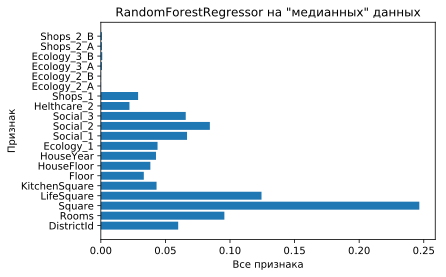

In [85]:
plt.barh(bete_mms_feats, rfr.feature_importances_)
plt.xlabel('Все признака')
plt.ylabel('Признак')
plt.title('RandomForestRegressor на "медианных" данных')

# Finish

In [86]:
MMScaled_bete_test_merged = bete_test_merged.copy()

MMScaled_bete_test_merged[bete_mms_feats] = mmscaler.fit_transform(bete_test_merged[bete_mms_feats])

E:\Program Files\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [87]:
MMScaled_bete_test_merged.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Ecology_3_B,Shops_2_A,Shops_2_B,mean_sq,mean_lfsq,mean_kit,std_sq,std_lfsq,lfsq_to_sq,flat_nmb
0,725,0.273585,0.2,0.172904,0.287833,0.001626,0.064935,0.132653,0.571429,0.594403,...,1.0,0.0,1.0,48.109381,30.160707,9.760000,5.345825,3.561293,0.626919,175.0
1,15856,0.349057,0.2,0.218303,0.279268,0.003764,0.064935,0.051020,0.616071,0.145207,...,1.0,0.0,1.0,53.002091,32.447938,7.314685,6.407926,3.392358,0.612201,143.0
2,5480,0.896226,0.0,0.000000,0.135786,0.011382,0.012987,0.040816,0.008929,0.000000,...,1.0,0.0,1.0,52.708494,20.502345,11.000000,NaN,NaN,0.388976,1.0
3,15664,0.221698,0.2,0.283284,0.356940,0.006504,0.272727,0.214286,0.883929,0.195208,...,1.0,0.0,1.0,64.974843,35.830012,10.287671,10.413354,5.549740,0.551444,73.0
4,14275,0.127358,0.0,0.161679,0.224409,0.004878,0.207792,0.163265,0.973214,0.138268,...,1.0,1.0,0.0,39.600407,21.035935,8.000000,9.397570,5.103495,0.531205,17.0


In [88]:
MMScaled_bete_test_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 29 columns):
Id               5000 non-null int64
DistrictId       5000 non-null float64
Rooms            5000 non-null float64
Square           5000 non-null float64
LifeSquare       5000 non-null float64
KitchenSquare    5000 non-null float64
Floor            5000 non-null float64
HouseFloor       5000 non-null float64
HouseYear        5000 non-null float64
Ecology_1        5000 non-null float64
Social_1         5000 non-null float64
Social_2         5000 non-null float64
Social_3         5000 non-null float64
Healthcare_1     2623 non-null float64
Helthcare_2      5000 non-null float64
Shops_1          5000 non-null float64
Ecology_2_A      5000 non-null float64
Ecology_2_B      5000 non-null float64
Ecology_3_A      5000 non-null float64
Ecology_3_B      5000 non-null float64
Shops_2_A        5000 non-null float64
Shops_2_B        5000 non-null float64
mean_sq          4999 non-null float6

In [89]:
bete_test_merged_predict = rfr.predict(MMScaled_bete_test_merged[bete_mms_feats])
bete_test_merged_predict

array([258250.9173339 , 262569.34066264, 335731.86149774, ...,
       435106.75073585, 242725.75148838, 266374.11311168])

In [90]:
bete_test_merged['Price'] = bete_test_merged_predict

In [91]:
bete_test_merged.loc[:, ['Id', 'Price']].to_csv('DSokolov_predictions.csv', index=None)

In [92]:
xxx = pd.read_csv('DSokolov_predictions.csv')

In [93]:
xxx

,Id,Price
0,725,258250.917334
1,15856,262569.340663
2,5480,335731.861498
3,15664,405826.439924
4,14275,162454.359675
5,7633,275330.128255
6,13329,204120.116366
7,5502,360821.672089
8,4220,436020.726130
9,11538,240453.617540
